**Module-4**
***

# Lab: Model Development - Used car Pricing

### Model Development
Estimated time needed: 30 minutes

Objectives
After completing this lab you will be able to:

Develop prediction models

In this section, we will develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost.

Some questions we want to ask in this module

- Do I know if the dealer is offering fair value for my trade-in?
- Do I know if I put a fair value on my car?
In data analytics, we often use Model Development to help us predict future observations from the data we have.

A model will help us understand the exact relationship between different variables and how these variables are used to predict the result.

### Setup
Import libraries:

In [ ]:
%pip install pandas numpy 

%pip install scikit-learn                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Load the data and store it in dataframe df:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

df = pd.read_csv(file_path)
df.head()


,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## 1. Linear Regression and Multiple Linear Regression
**Linear Regression**
One example of a Data Model that we will be using is:

**Simple Linear Regression**
Simple Linear Regression is a method to help us understand the relationship between two variables:

- The predictor/independent variable (X)
- The response/dependent variable (that we want to predict)(Y)
The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.

$$ Y: Response \ Variable\\\\\\ X: Predictor \ Variables $$

**Linear Function** 
$$ Y(hat) = a + b X $$

- a refers to the intercept of the regression line, in other words: the value of Y when X is 0
- b refers to the slope of the regression line, in other words: the value with which Y changes when X increases by 1 unit

**Let's load the modules for linear regression:**

In [17]:
from sklearn.linear_model import LinearRegression

### Create the linear regression object:

In [18]:
lm = LinearRegression()
lm

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Q. How could "highway-mpg" help us predict car price?

For this example, we want to look at how highway-mpg can help us predict car price. Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.

In [19]:
X = df[['highway-mpg']]
Y = df['price']

Fit the linear model using highway-mpg:

In [20]:
lm.fit(X,Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


We can output a prediction:

In [21]:
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

**What is the value of the intercept (a)?**

In [22]:
lm.intercept_

np.float64(38423.3058581574)

**What is the value of the slope (b)?**

In [23]:
lm.coef_

array([-821.73337832])

**What is the final estimated linear model we get?**
As we saw above, we should get a final linear model with the structure:

$$ Yhat = a + b X $$

Plugging in the actual values we get:

Price = 38423.31 - 821.73 x highway-mpg

In [24]:
# this is Measures for In-Sample Evaluation, R^2 measurement to determine how good fit is the model. 
# Range is 0 to 1, if 0 then not a good fit and if 1 then perfectly fit 
lm.score(X,Y)

0.4965911884339176

### Question #1 
a) Create a linear regression object called "lm1".

In [25]:
lm1 = LinearRegression()
lm1

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Question #1 
b) Train the model using "engine-size" as the independent variable and "price" as the dependent variable?

In [26]:
X1 = df[['engine-size']]
Y1 = df['price']

lm1.fit(X1,Y1)

Yhat1=lm1.predict(X1)
Yhat1[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

### Question #1 
c) Find the slope and intercept of the model.

In [27]:
# Slope
lm1.coef_

array([166.86001569])

In [28]:
# Intercept
lm1.intercept_

np.float64(-7963.338906281024)

### Question #1 
d) What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".

**What is the final estimated linear model we get?**
As we saw above, we should get a final linear model with the structure:

$$ Yhat1 = a + b X1 $$

Plugging in the actual values we get:

**price = -7963.34 + 166.86 x df[engine-size]**

### **Multiple Linear Regression**

What if we want to predict car price using more than one variable?

If we want to use more variables in our model to predict car price, we can use Multiple Linear Regression. Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables. Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:

$$ Y: Response \ Variable\\\\\\ X_1 :Predictor\ Variable \ 1\\ X_2: Predictor\ Variable \ 2\\ X_3: Predictor\ Variable \ 3\\ X_4: Predictor\ Variable \ 4\\ $$

$$ a: intercept\\\\\\ b_1 :coefficients \ of\ Variable \ 1\\ b_2: coefficients \ of\ Variable \ 2\\ b_3: coefficients \ of\ Variable \ 3\\ b_4: coefficients \ of\ Variable \ 4\\ $$

The equation is given by:

$$ Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4 $$

From the previous section we know that other good predictors of price could be:
- Horsepower
- Curb-weight
- Engine-size
- Highway-mpg
Let's develop a model using these variables as the predictor variables.

In [29]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [30]:
lm.fit(Z, df['price'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


What is the value of the intercept(a)?

In [31]:
lm.intercept_

np.float64(-15806.62462632923)

What are the values of the coefficients (b1, b2, b3, b4)?

In [32]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

What is the final estimated linear model that we get?

As we saw above, we should get a final linear function with the structure:

$$ Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4 $$

What is the linear function we get in this example?

Price = -15806.62 + 52.49 x horsepower + 4.70 x curb-weight + 81.53 x engine-size + 36.05 x highway-mpg

### Question #2 
a) Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg".

In [33]:
lm2 = LinearRegression()

Z2 = df[['normalized-losses','highway-mpg']]
lm2.fit(Z2, df['price'])


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
lm2.intercept_

np.float64(38201.31327245727)

### Question #2 

b) Find the coefficient of the model.

In [35]:
lm2.coef_

array([   1.49789586, -820.45434016])

### **2. Model Evaluation Using Visualization**
Now that we've developed some models, how do we evaluate our models and choose the best one? One way to do this is by using a visualization.

Import the visualization package, seaborn:

In [36]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

### **Regression Plot**
When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using **regression plots.**

This plot will show a combination of a scattered data points (a **scatterplot**), as well as the fitted **linear regression** line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

Let's visualize **highway-mpg** as potential predictor variable of price:

(0.0, 48175.2016090468)

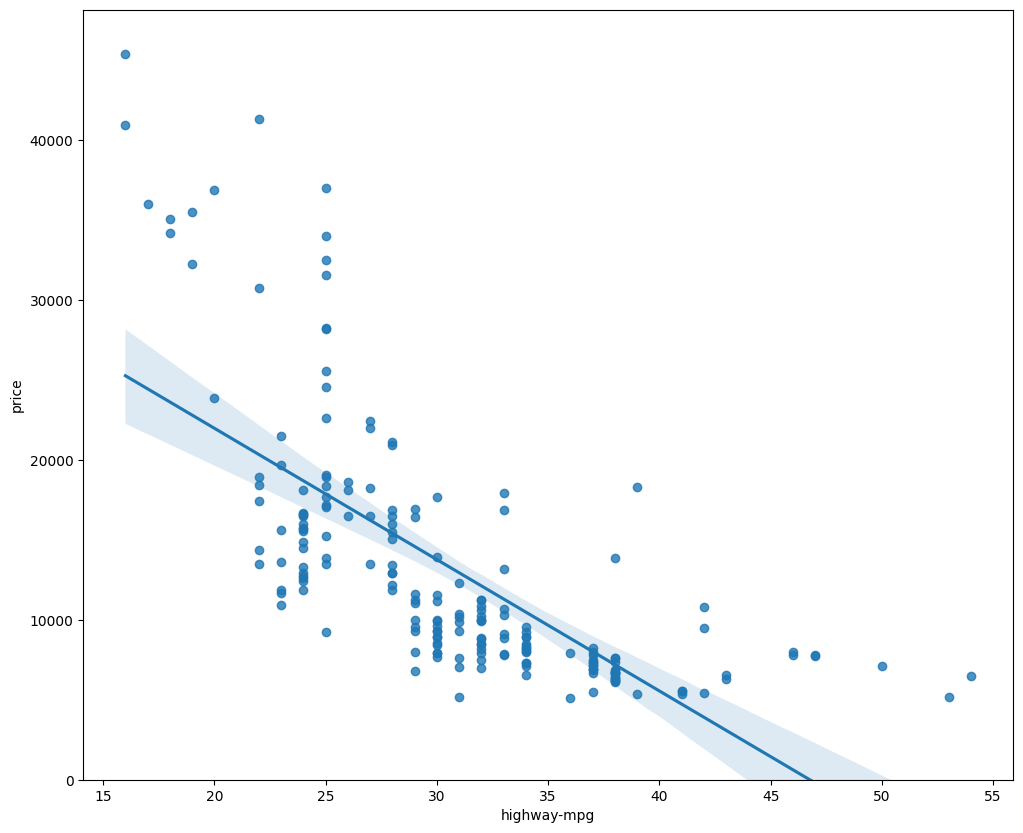

In [37]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

Let's compare this plot to the regression plot of "peak-rpm".

(0.0, 47414.1)

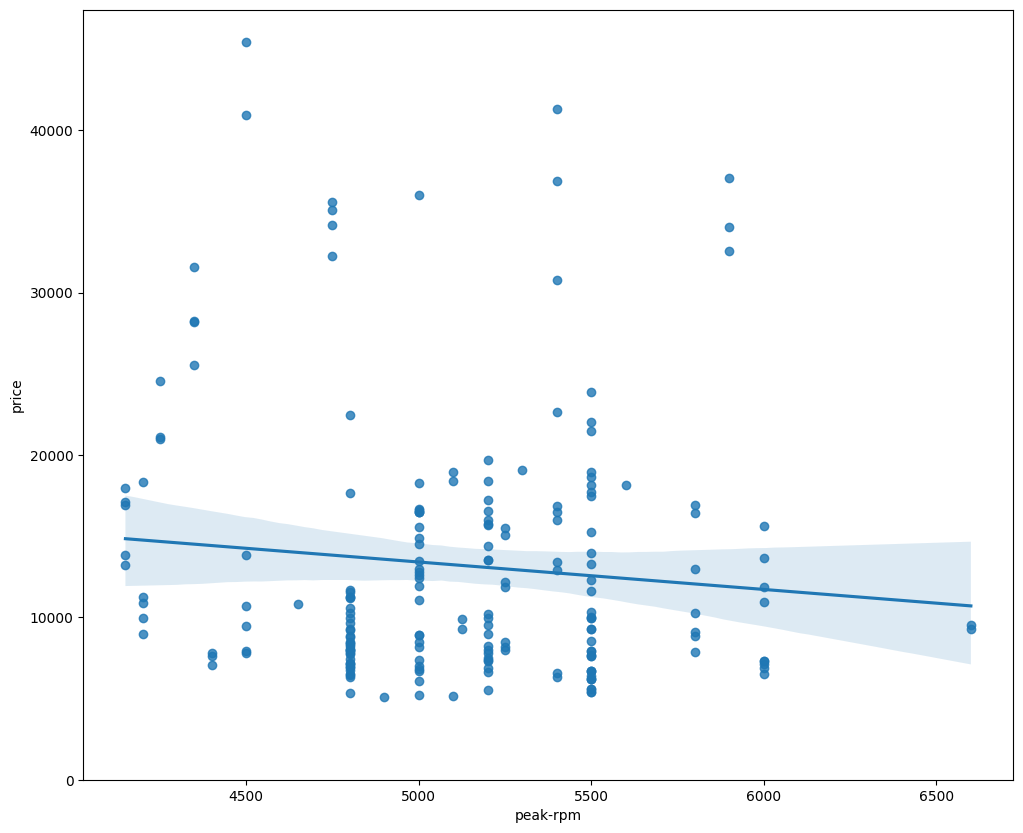

In [38]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.

### Question #3:
Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method ".corr()" to verify your answer.

In [39]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


### **Residual Plot**

A good way to visualize the variance of the data is to use a residual plot.

What is a residual?

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

So what is a residual plot?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

What do we pay attention to when looking at a residual plot?

We look at the spread of the residuals:

- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

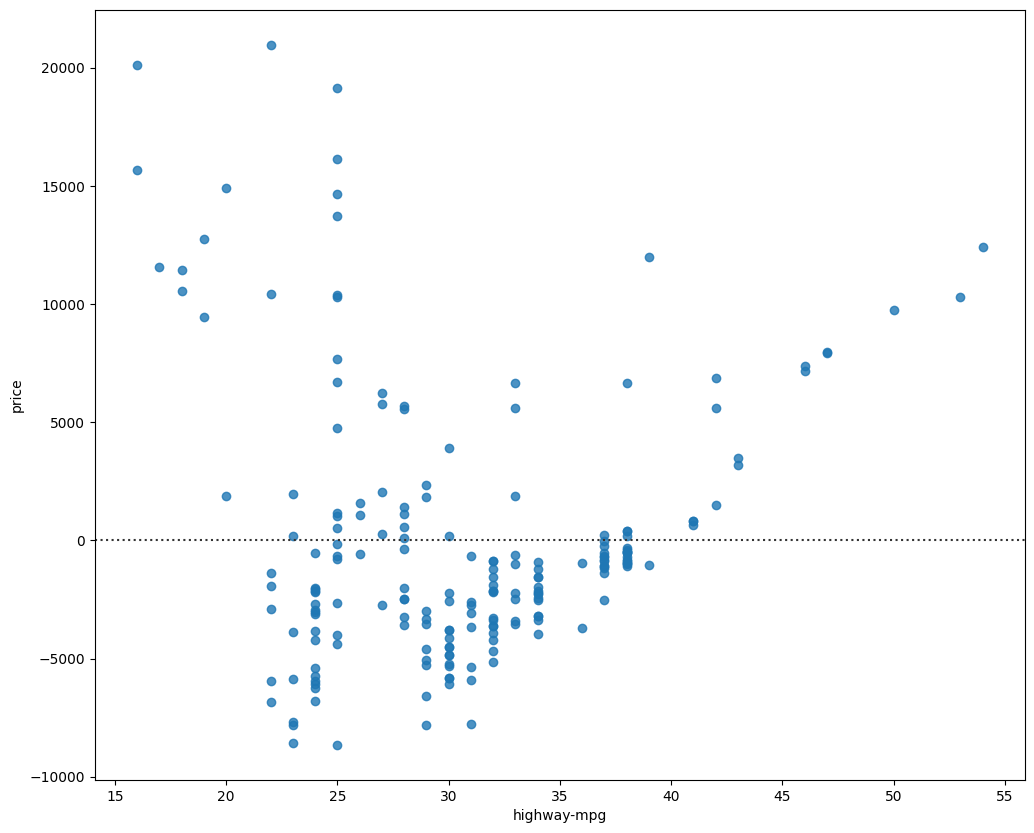

In [40]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()

*What is this plot telling us?*

*We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.*

### **Multiple Linear Regression**
How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

First, let's make a prediction:

In [41]:
Y_hat = lm.predict(Z)

C:\Users\jayes\AppData\Local\Temp\ipykernel_8484\4196657742.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\jayes\AppData\Local\Temp\ipykernel_8484\4196657742.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

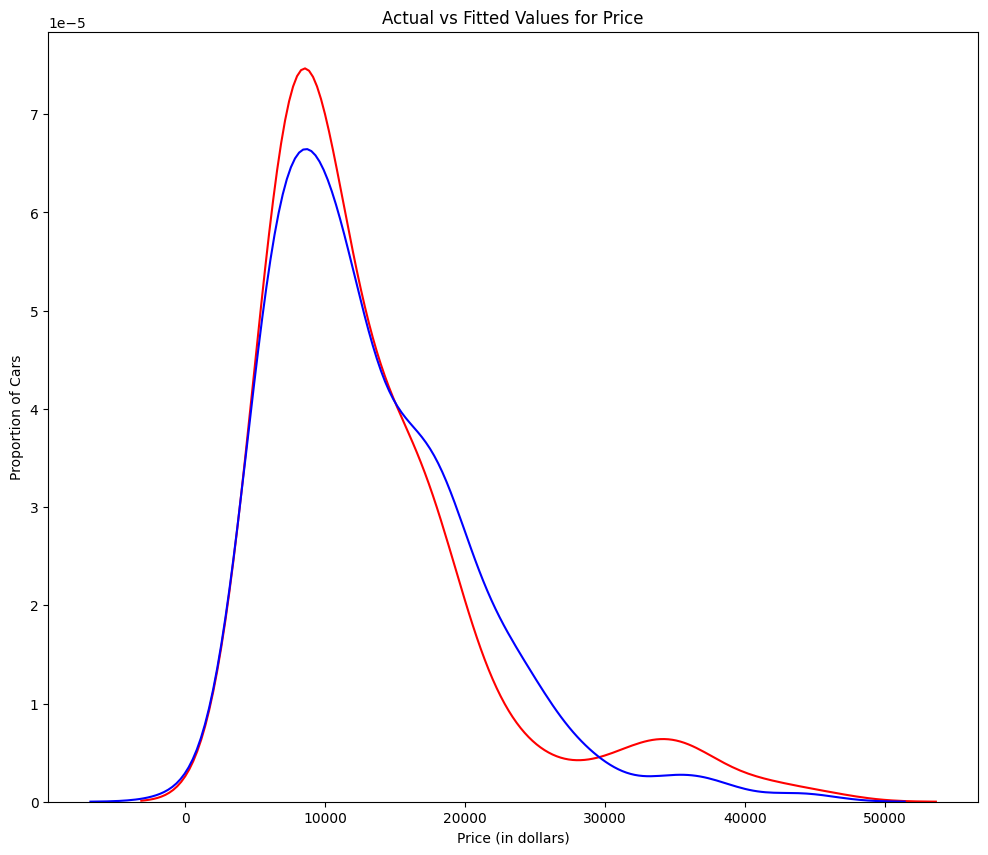

In [42]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.

### **3. Polynomial Regression and Pipelines**
Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

There are different orders of polynomial regression:


Quadratic - 2nd Order
$$ Yhat = a + b_1 X +b_2 X^2 $$
Cubic - 3rd Order
$$ Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\ $$
Higher-Order:
$$ Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\ $$
We saw earlier that a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

We will use the following function to plot the data:

In [43]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Let's get the variables:

In [44]:
x = df['highway-mpg']
y = df['price']

Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function.

In [45]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Let's plot the function:

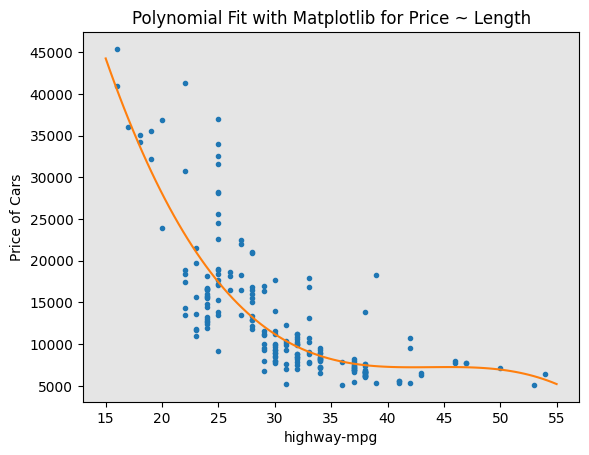

In [46]:
PlotPolly(p, x, y, 'highway-mpg')

In [47]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

### Question #4:
Create 11 order polynomial model with the variables x and y from above.

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


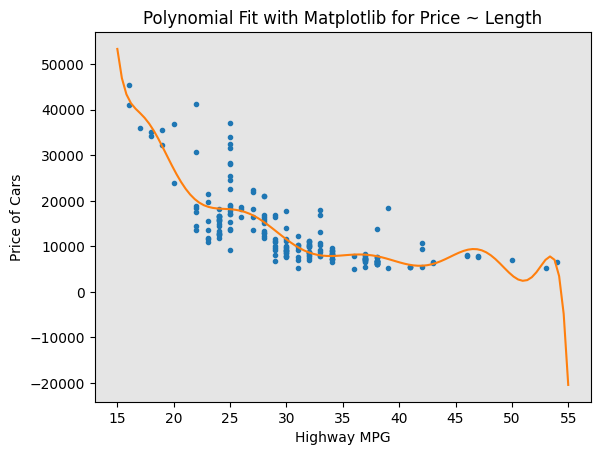

In [48]:
# Here we use a polynomial of the 11rd order (cubic) 
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2) polynomial with two variables is given by:

$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$


We can perform a polynomial transform on multiple features. First, we import the module:

In [49]:
from sklearn.preprocessing import PolynomialFeatures

In [50]:
# We create a PolynomialFeatures object of degree 2:
pr=PolynomialFeatures(degree=2)
pr

,degree,2
,interaction_only,False
,include_bias,True
,order,'C'


In [51]:
Z_pr=pr.fit_transform(Z)

In the original data, there are 201 samples and 4 features.

In [52]:
Z.shape

(201, 4)

After the transformation, there are 201 samples and 15 features.

In [53]:
Z_pr.shape

(201, 15)

### **Pipeline**
Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [55]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

We input the list as an argument to the pipeline constructor:

In [56]:
pipe=Pipeline(Input)
pipe

,steps,"[('scale', ...), ('polynomial', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,degree,2
,interaction_only,False
,include_bias,False
,order,'C'


First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data,  perform a transform and fit the model simultaneously. 


In [57]:
Z = Z.astype(float)
pipe.fit(Z,y)

,steps,"[('scale', ...), ('polynomial', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,degree,2
,interaction_only,False
,include_bias,False
,order,'C'


Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously.

In [58]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

### Question #5:
Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

In [59]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]
pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

### **4. Measures for In-Sample Evaluation**
When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

- R^2 / R-squared
- Mean Squared Error (MSE)

**R-squared**

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

**Mean Squared Error (MSE)**

The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).

**Model 1: Simple Linear Regression**

Let's calculate the R^2:

In [60]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


We can say that ~49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".

Let's calculate the MSE:

We can predict the output i.e., "yhat" using the predict method, where X is the input variable:

In [61]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


Let's import the function mean_squared_error from the module metrics:

In [62]:
from sklearn.metrics import mean_squared_error

We can compare the predicted results with the actual results:

In [63]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


**Model 2: Multiple Linear Regression**

Let's calculate the R^2:

In [64]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


We can say that ~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".

Let's calculate the MSE.

We produce a prediction:

In [65]:
Y_predict_multifit = lm.predict(Z)

We compare the predicted results with the actual results:

In [66]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


**Model 3: Polynomial Fit**

Let's calculate the R^2.

Let’s import the function r2_score from the module metrics as we are using a different function.

In [67]:
from sklearn.metrics import r2_score

We apply the function to get the value of R^2:

In [68]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


We can say that ~67.419 % of the variation of price is explained by this polynomial fit.

MSE

We can also calculate the MSE:

In [69]:
mean_squared_error(df['price'], p(x))

20474146.426361218

### **5. Prediction and Decision Making**

**Prediction**

In the previous section, we trained the model using the method fit. Now we will use the method predict to produce a prediction. Lets import pyplot for plotting; we will also be using some functions from numpy.

In [70]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Create a new input:

In [72]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

Fit the model:

In [73]:
lm.fit(X, Y)
lm

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Produce a prediction:

In [74]:
yhat=lm.predict(new_input)
yhat[0:5]

c:\Users\jayes\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

We can plot the data:

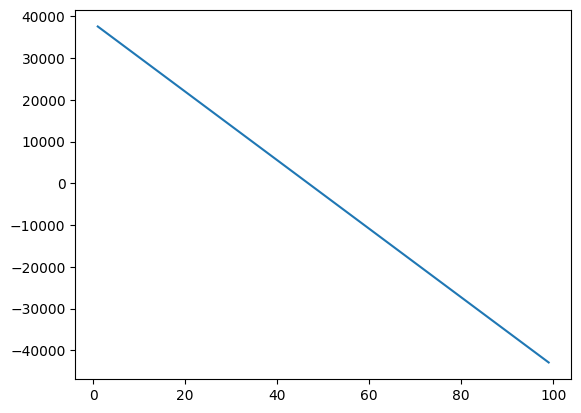

In [75]:
plt.plot(new_input, yhat)
plt.show()

### **Decision Making: Determining a Good Model Fit**


<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>


<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>
    
<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


### **Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)**

<p>Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. As a result, you should always check the MSE and R^2.</p>

<p>In order to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
<ul>
    <li><b>MSE</b>: The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>
</p>

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.

### **Simple Linear Model (SLR) vs. Polynomial Fit**

<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.</p>

### **Multiple Linear Regression (MLR) vs. Polynomial Fit**

<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>



### **Conclusion**

Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.

# Lab: Model Development - Laptop Pricing

### Hands-on practice lab: Model Development
Estimated time needed: 45 minutes

In this lab, you will use the skills acquired in throughout the module, and use linear regression principles to create a model that predicts the Price of the laptop, based on one or more attributes of the dataset.

### Objectives
After completing this lab you will be able to:

- Use Linear Regression in one variable to fit the parameters to a model
- Use Linear Regression in multiple variables to fit the parameters to a model
- Use Polynomial Regression in single variable tofit the parameters to a model
- Create a pipeline for performing linear regression using multiple features in polynomial scaling
- Evaluate the performance of different forms of regression on basis of MSE and R^2 parameters

### Setup
For this lab, we will be using the following libraries:

- pandas for managing the data.
- numpy for mathematical operations.
- sklearn for machine learning and machine-learning-pipeline related functions.
- seaborn for visualizing the data.
- matplotlib for additional plotting tools.

The following required libraries are not pre-installed in the Skills Network Labs environment. You will need to run the following cell to install them:

**Importing Required Libraries**

We recommend you import all required libraries in one place (here):

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

**Importing the dataset**

Run the cell below to download the dataset into this environment.

This function will download the dataset into your browser

We put the file path along with a quotation mark so that pandas will read the file into a dataframe from that address. The file path can be either an URL or your local file address.

In [16]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

You will need to download the dataset using the download() function:

In [17]:
df = pd.read_csv(path)

In [18]:
print("The first 5 rows of the dataframe") 
df.head()

The first 5 rows of the dataframe


,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


### Task 1 : Single Linear Regression

You have learnt that "CPU_frequency" is the parameter with the lowest p-value among the different features of the dataset. Create a single feature Linear Regression model that fits the pair of "CPU_frequency" and "Price" to find the model for prediction.

In [19]:
lmx = LinearRegression()

X2 = df[['CPU_frequency']]
Y2 = df['Price']

lmx.fit(X2,Y2)

Yh2 = lmx.predict(X2)

In [20]:
lmx.intercept_

np.float64(253.6611706858214)

Generate the Distribution plot for the predicted values and that of the actual values. How well did the model perform?

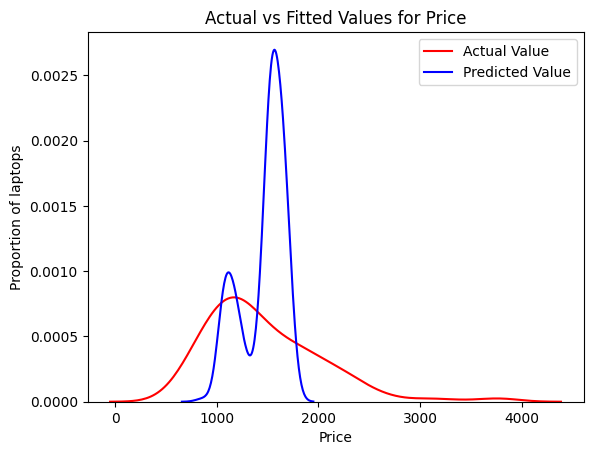

In [21]:
k = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.distplot(Yh2, hist=False, color="b", label="Fitted Values" , ax=k)
# sns.distplot(Predicted value, Actual value)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

Evaluate the Mean Squared Error and R^2 score values for the model.

In [22]:
p = lmx.score(X2,Y2)

q = mean_squared_error(df['Price'],Yh2)

print("The mean squared error value is",q ,"\n The r squared error value is",p)

The mean squared error value is 284583.4405868629 
 The r squared error value is 0.1344436321024326


### Task 2 - Multiple Linear Regression
The parameters which have a low enough p-value so as to indicate strong relationship with the 'Price' value are 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. Use all these variables to create a Multiple Linear Regression system.

In [32]:
Z1 = df[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' , 'Category']]
lmt = LinearRegression()
lmt.fit(Z1, df['Price'])

Yht = lmt.predict(Z1)


In [26]:
lmt.intercept_

np.float64(-841.9913259091256)

In [28]:
lmt.coef_

array([ 9.61283977e+02,  8.68089292e+01,  3.94604825e-01,  6.56633979e+01,
       -4.27445318e+02,  9.78000871e+01,  1.91295466e+02])

Plot the Distribution graph of the predicted values as well as the Actual values

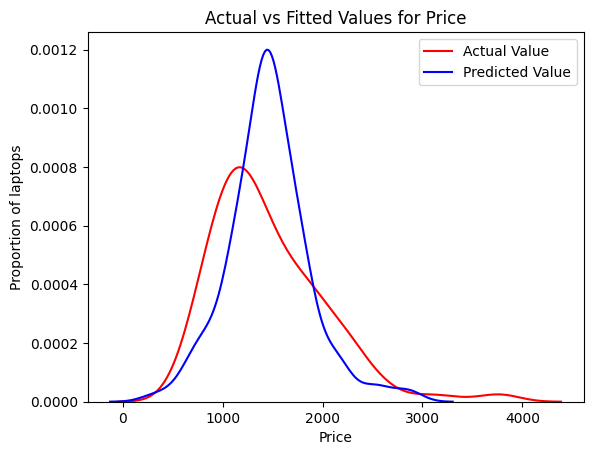

In [33]:
k1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.distplot(Yht, hist=False, color="b", label="Fitted Values" , ax=k1)
# sns.distplot(Predicted value, Actual value)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

Find the R^2 score and the MSE value for this fit. Is this better or worst than the performance of Single Linear Regression?

In [35]:

p1 = lmt.score(Z1, df['Price'])

q1 = mean_squared_error(df['Price'],Yht)

print("Multiple Linear Regression result:- \n","The mean squared error value is",q1 ,"\n The r squared error value is",p1,"\n")
print("Single Linear Regression result:- \n","The mean squared error value is",q ,"\n The r squared error value is",p)
print("For better fit for data we must check mean squared error value as smallest value and \n check r squared value as highest ")

Multiple Linear Regression result:- 
 The mean squared error value is 161680.57263893104 
 The r squared error value is 0.5082509055187376 

Single Linear Regression result:- 
 The mean squared error value is 284583.4405868629 
 The r squared error value is 0.1344436321024326
For better fit for data we must check mean squared error value as smallest value and 
 check r squared value as highest 
